In [34]:
# read in the data here
import pandas as pd
import numpy as np
from pandas import DataFrame
import os

df = pd.read_csv("../data/covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [26]:
print(df["Cover_Type"].value_counts())

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


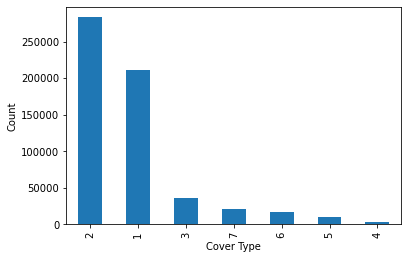

In [2]:
import matplotlib
from matplotlib import pylab as plt
pd.value_counts(df['Cover_Type']).plot.bar()
plt.ylabel('Count')
plt.xlabel('Cover Type')
plt.savefig('../figures/bar_plot_target.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
continuous_features = ['Aspect','Slope','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                       'Elevation','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                   'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']

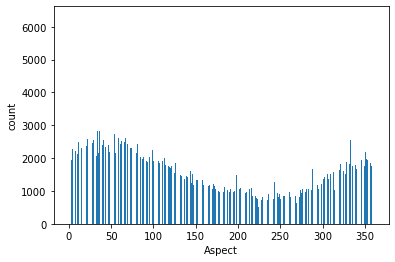

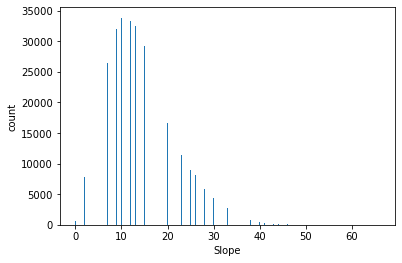

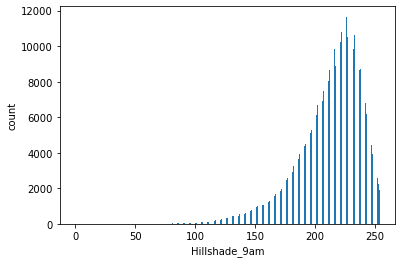

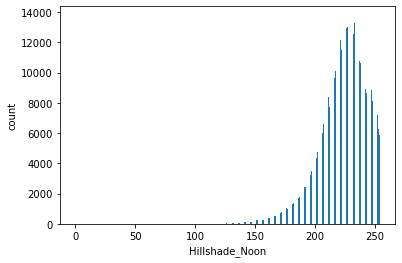

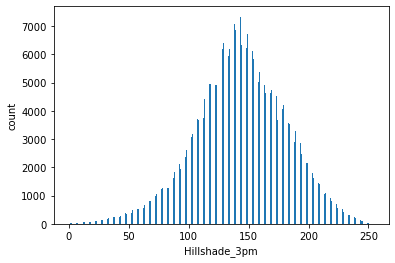

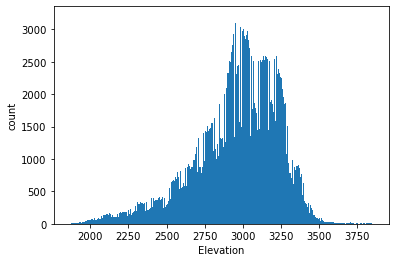

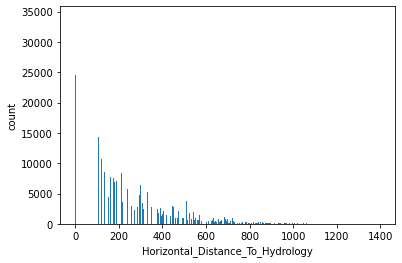

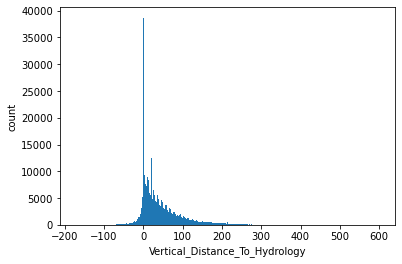

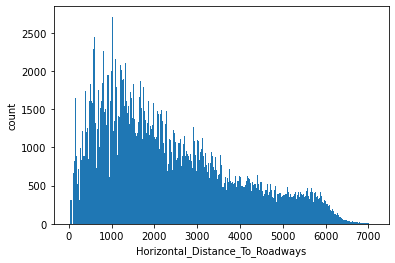

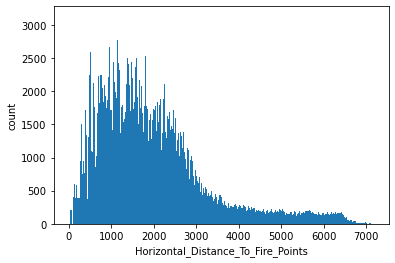

In [29]:
for i in continuous_features:
    df[i].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
    plt.xlabel(i)
    plt.ylabel('count')
    plt.savefig('../figures/histogram_'+i+'.png', dpi=300, bbox_inches='tight')
    plt.show()

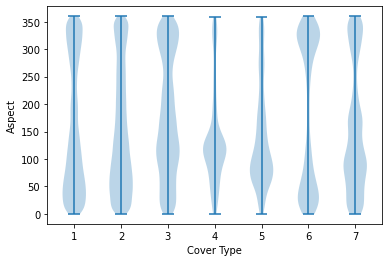

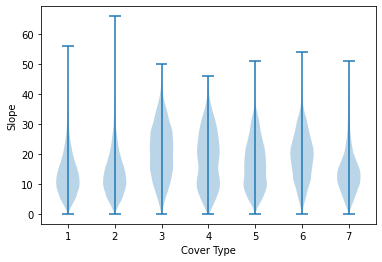

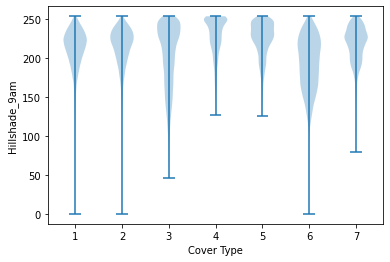

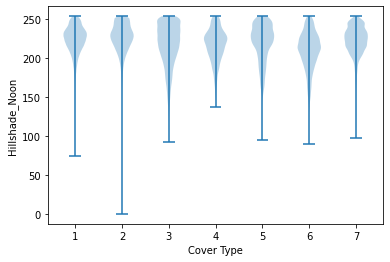

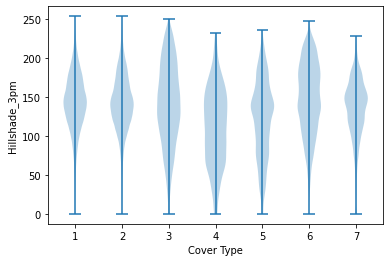

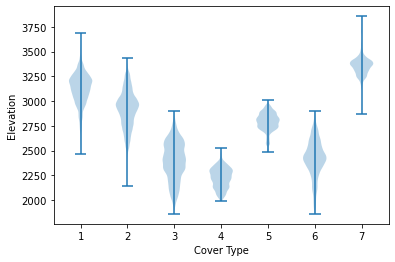

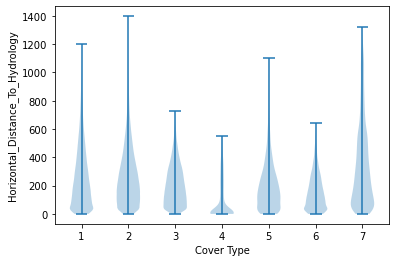

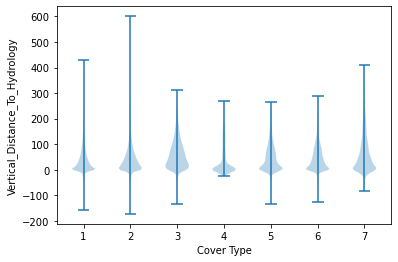

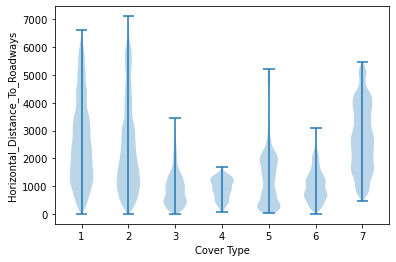

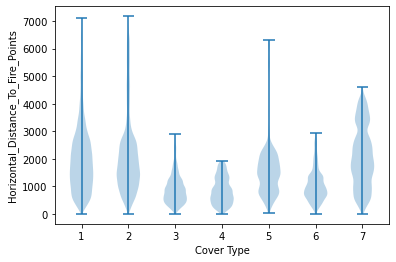

In [30]:
for i in continuous_features:
    dataset = [df[df['Cover_Type']==1][i].values,
               df[df['Cover_Type']==2][i].values,
               df[df['Cover_Type']==3][i].values,
               df[df['Cover_Type']==4][i].values,
               df[df['Cover_Type']==5][i].values,
               df[df['Cover_Type']==6][i].values,
               df[df['Cover_Type']==7][i].values]

    plt.violinplot(dataset = dataset)
    plt.xticks([1,2,3,4,5,6,7],['1','2','3','4','5','6','7'])
    plt.ylabel(i)
    plt.xlabel('Cover Type')
    plt.savefig('../figures/violin_plot_'+i+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [31]:
# pd.plotting.scatter_matrix(df[continuous_features], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
#                            s=30, alpha=.1)
# plt.show()

In [32]:
binary_features = ['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5',
                      'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                      'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15',
                      'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                      'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                      'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                      'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35',
                      'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',
                      'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']

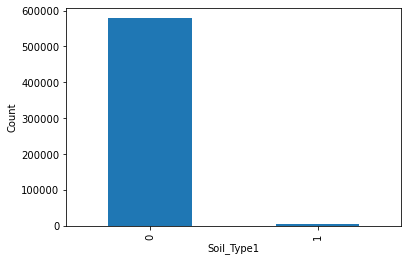

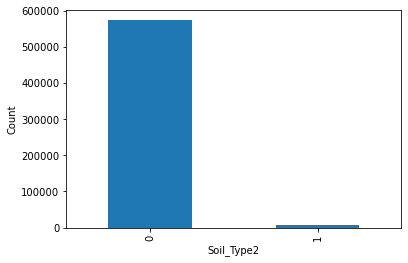

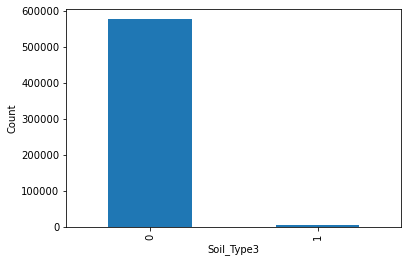

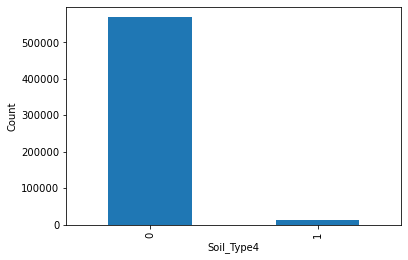

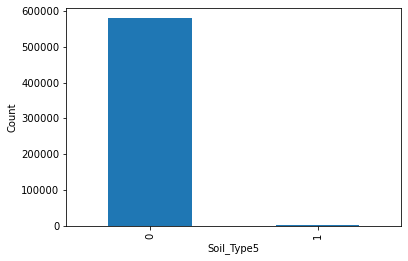

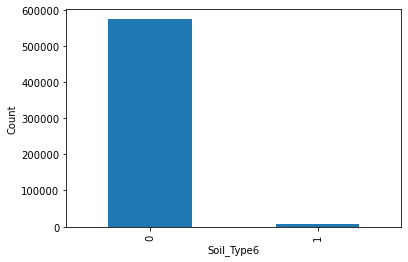

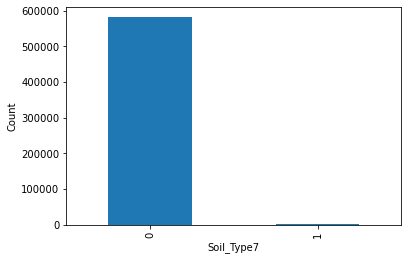

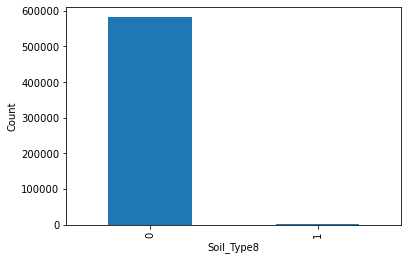

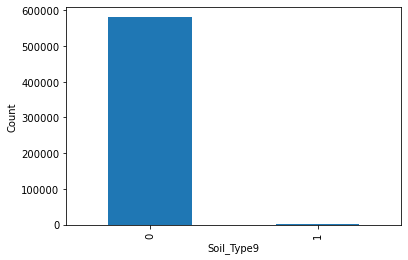

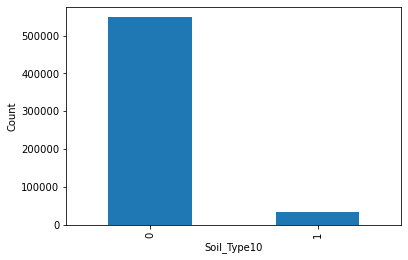

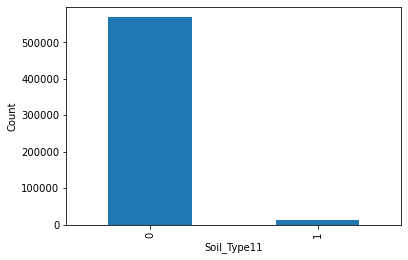

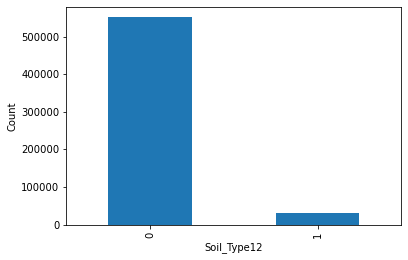

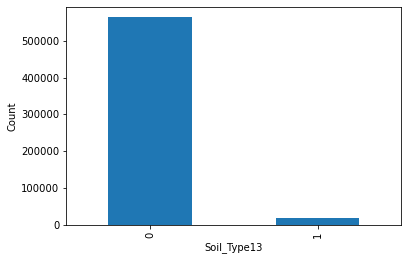

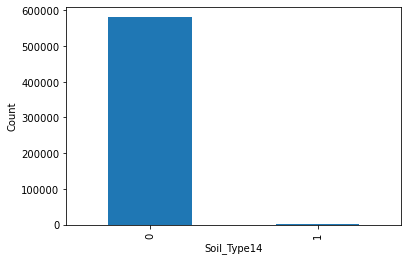

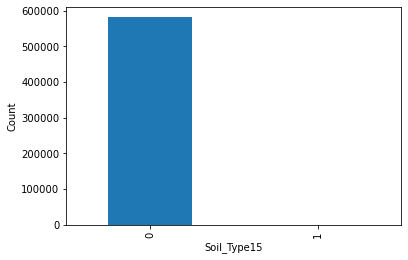

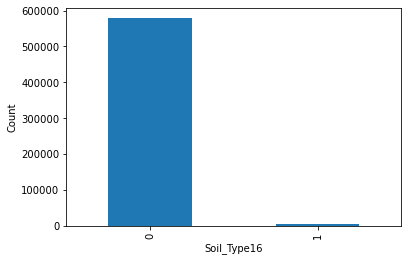

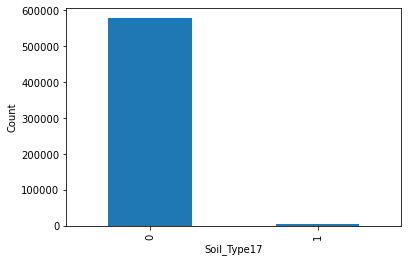

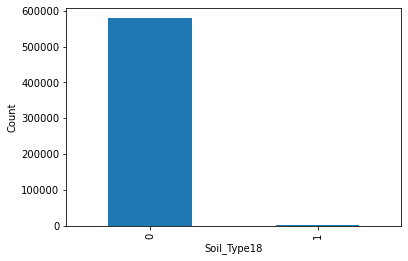

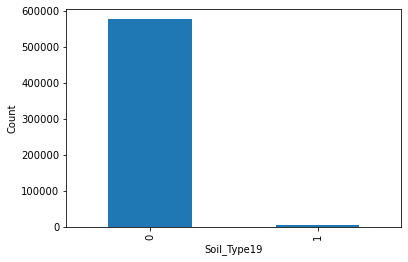

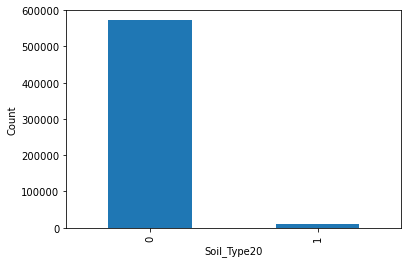

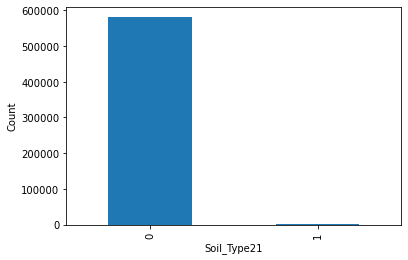

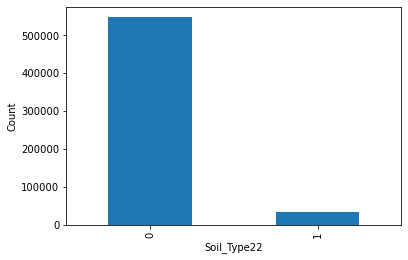

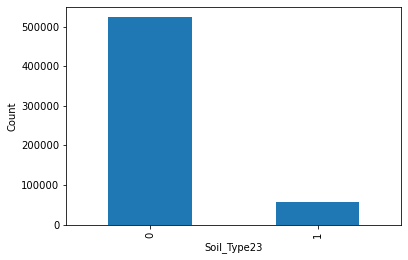

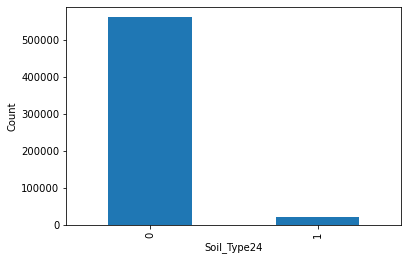

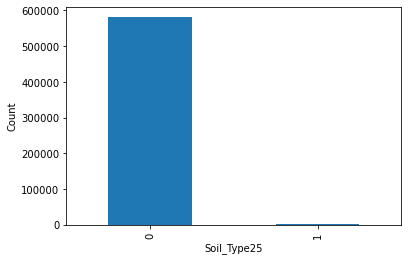

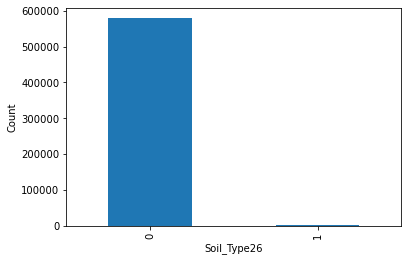

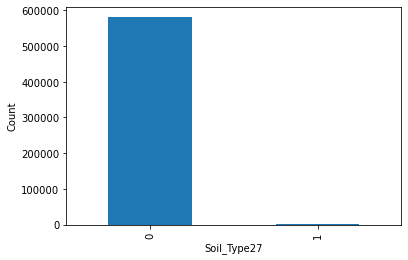

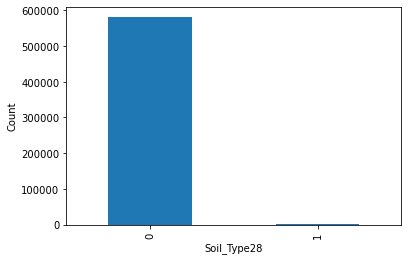

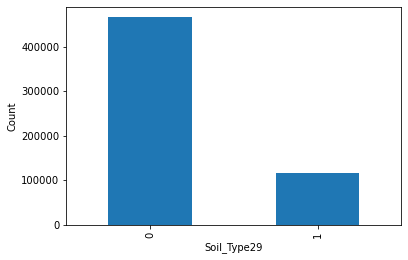

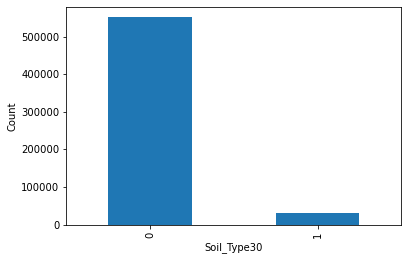

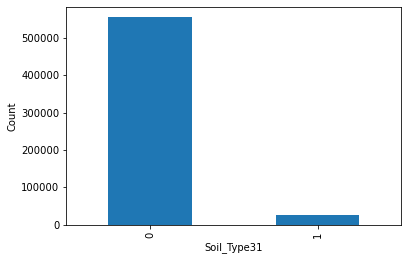

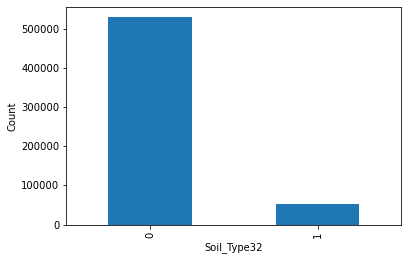

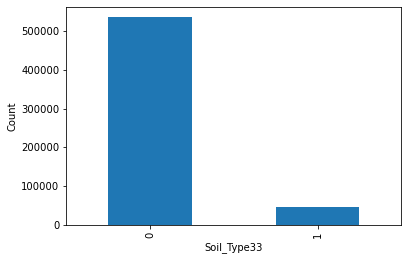

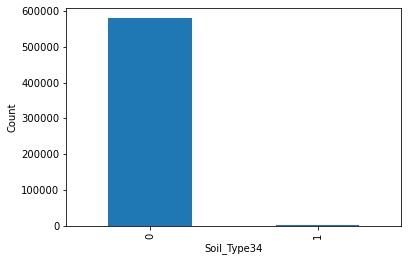

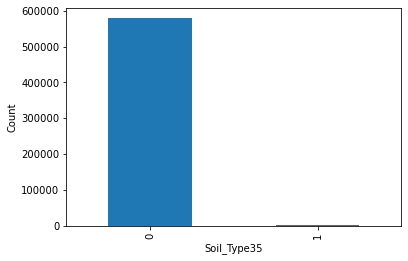

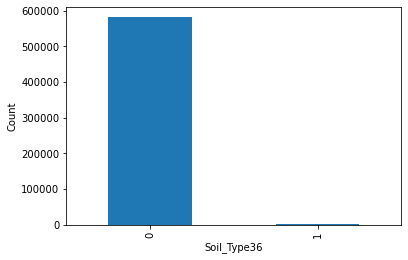

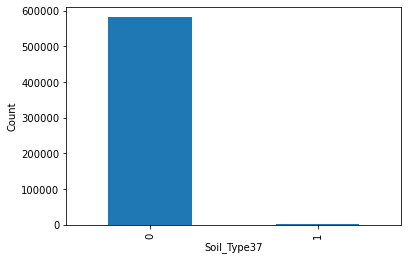

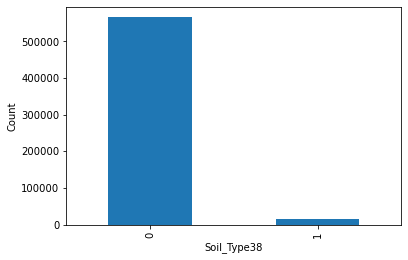

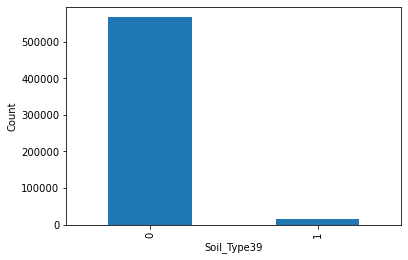

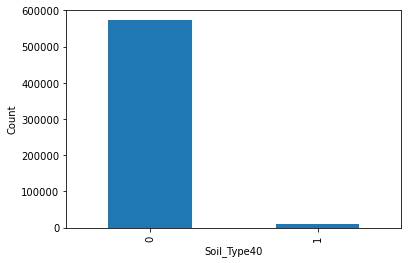

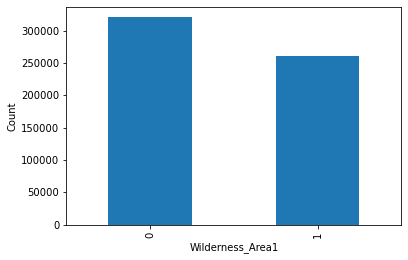

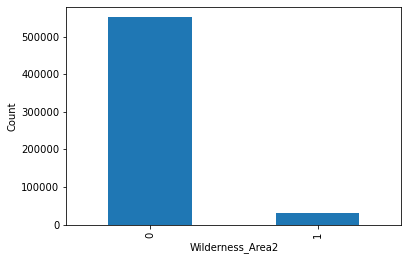

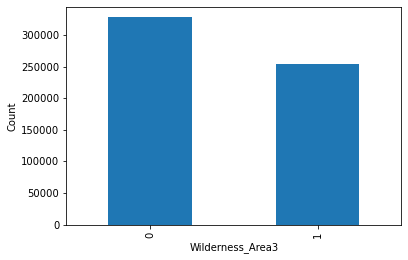

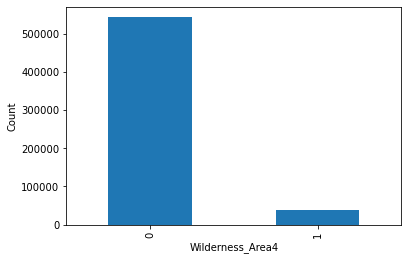

In [33]:
for i in binary_features:
    pd.value_counts(df[i]).plot.bar()
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.savefig('../figures/bar_plot_'+i+'.png', dpi=300, bbox_inches='tight')
    plt.show()

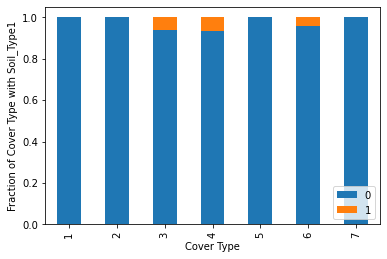

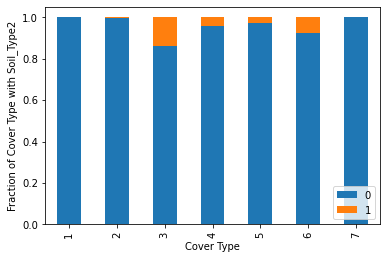

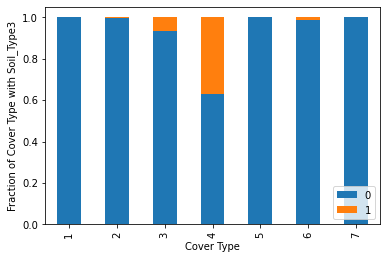

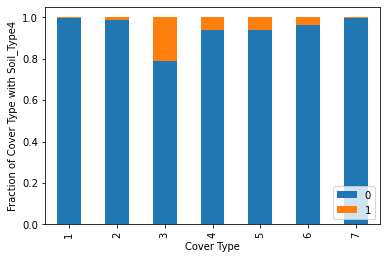

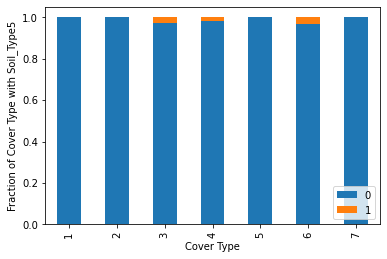

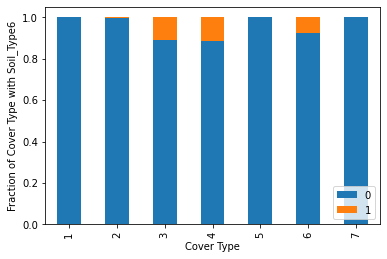

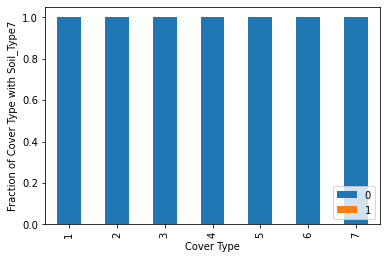

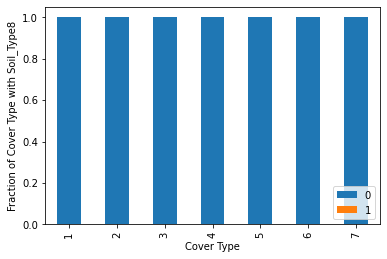

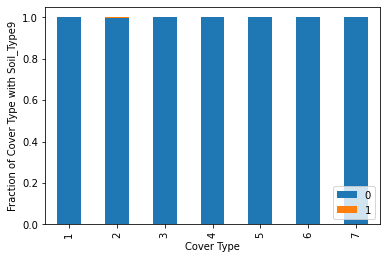

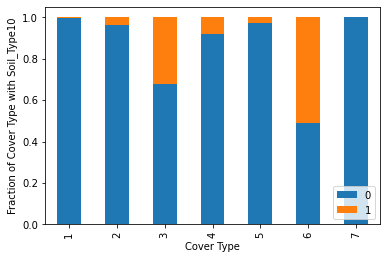

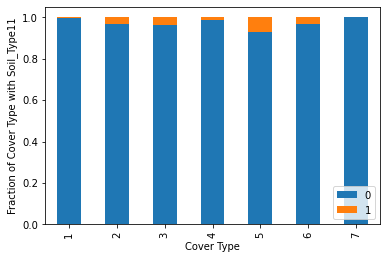

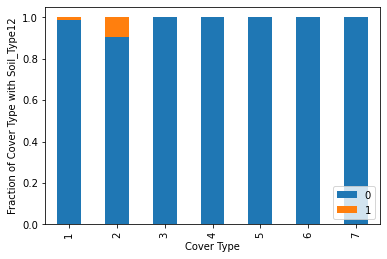

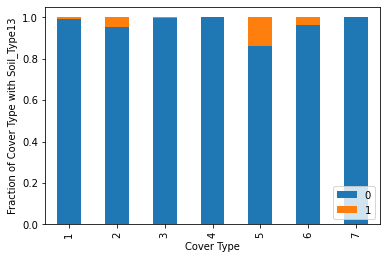

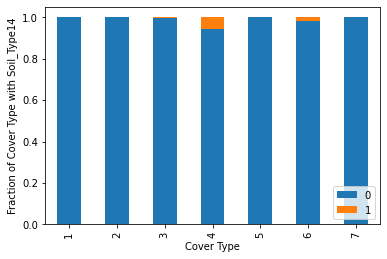

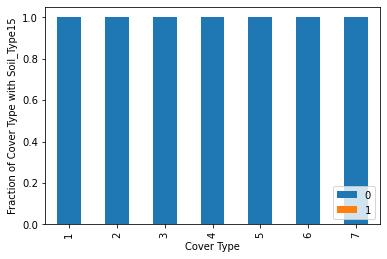

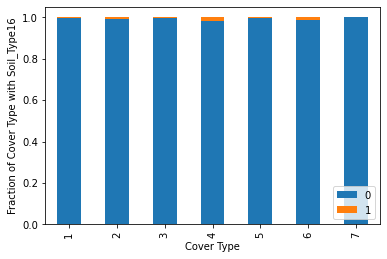

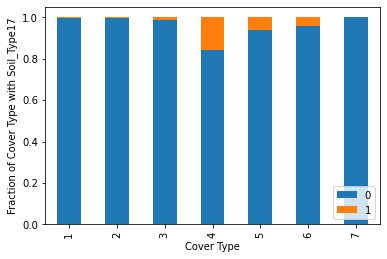

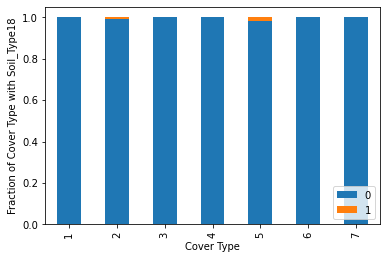

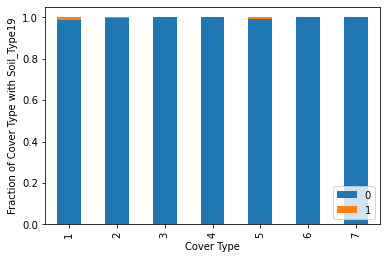

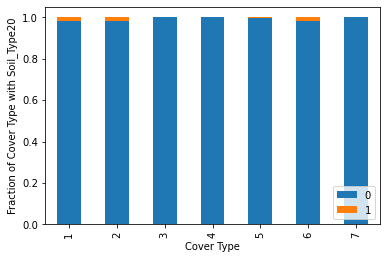

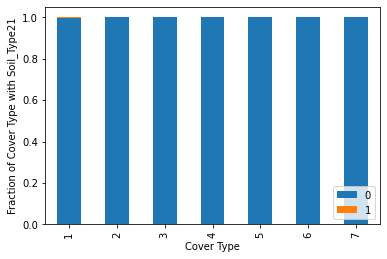

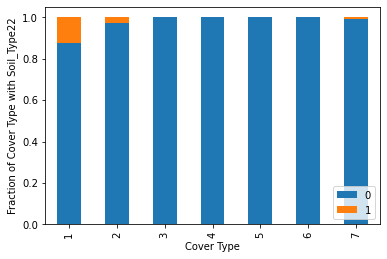

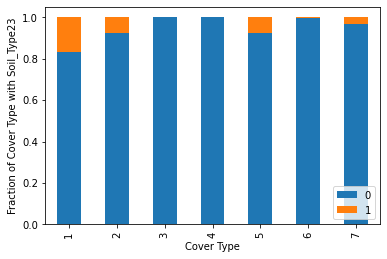

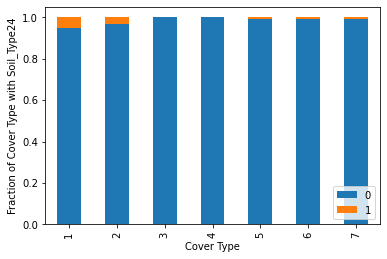

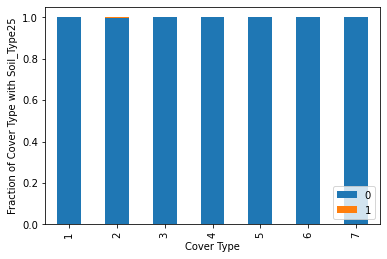

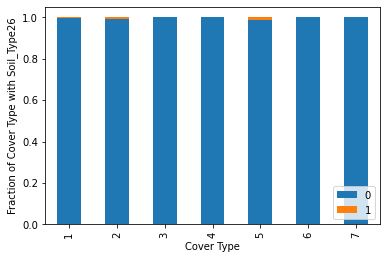

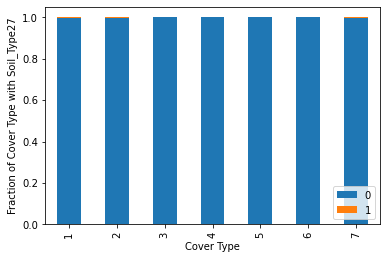

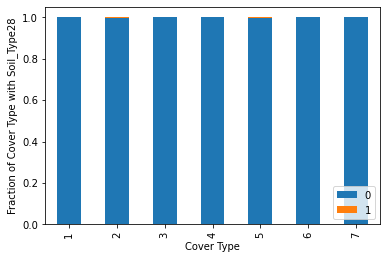

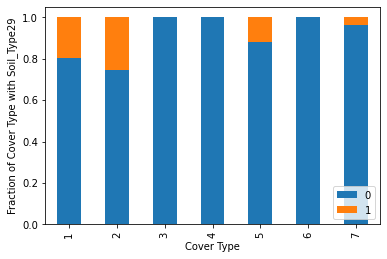

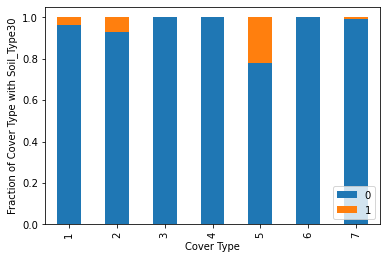

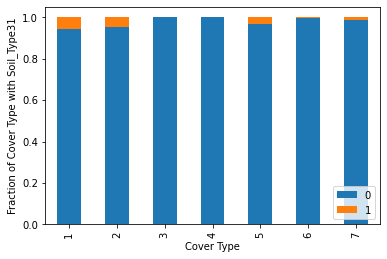

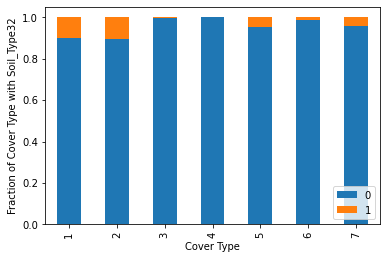

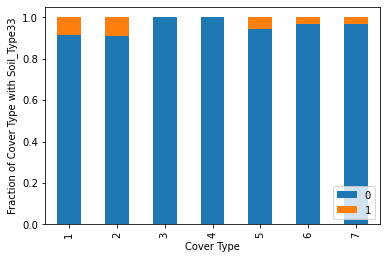

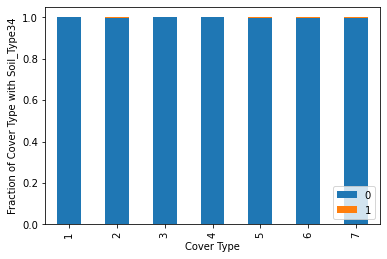

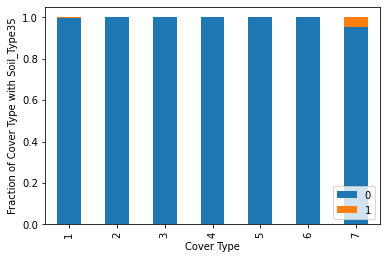

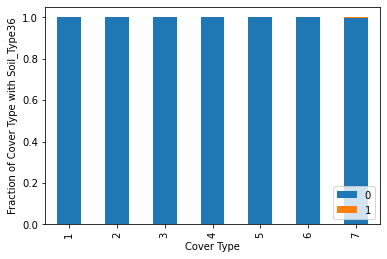

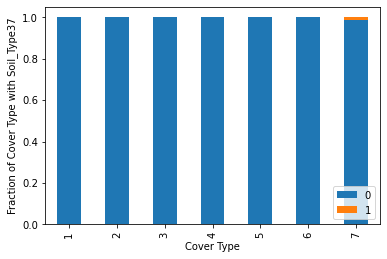

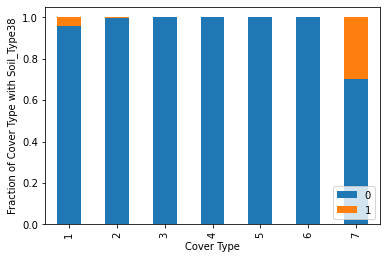

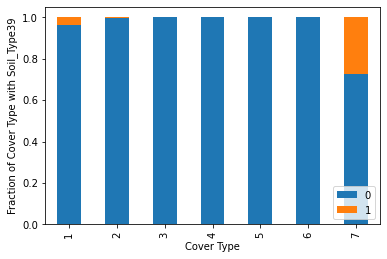

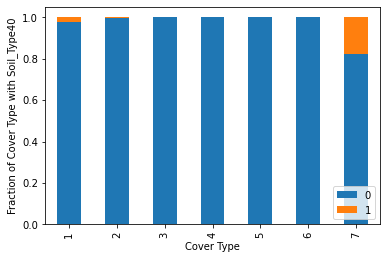

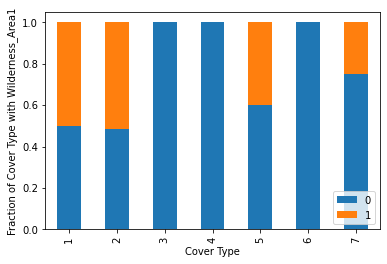

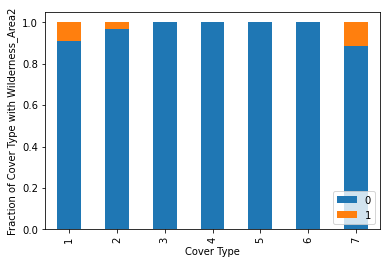

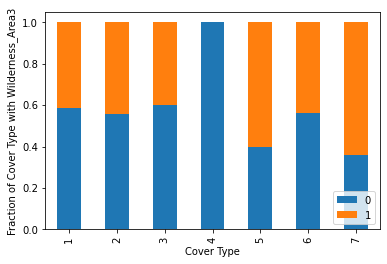

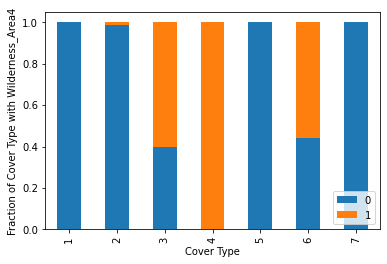

In [34]:
for i in binary_features:
    count_matrix = df.groupby(['Cover_Type', i]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('Fraction of Cover Type with '+ i)
    plt.xlabel('Cover Type')
    plt.legend(loc=4)
    plt.savefig('../figures/stacked_bar_plot_'+i+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import statistics

In [26]:
default_y = [2 for i in range(581012)]
actual_y = []
for i in range(len(y)):
    actual_y.append(y[i])
fbeta_score(default_y,actual_y, beta=1, average = 'weighted')

0.6555518660485264

In [88]:
def MLpipe_Stratified_F_Beta(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (90/10) and then applies KFold with 3 folds to other.
    The f_beta is maximized in cross-validation.
    '''  
    test_scores = []
    best_models = []
        
    random_state = 112

    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.1,stratify=y,random_state=random_state)
    kf = KFold(n_splits=3,shuffle=True,random_state=random_state) 
    X_other_prep = preprocessor.fit_transform(X_other)
    X_test_prep = preprocessor.transform(X_test)
    le = LabelEncoder()
    y_other_prep = le.fit_transform(y_other)
    y_test_prep = le.transform(y_test)
    f_beta_scorer = make_scorer(fbeta_score, beta=1, average = 'weighted')

    grid = GridSearchCV(estimator = ML_algo, param_grid=param_grid,scoring = f_beta_scorer,
            cv=kf, return_train_score = True, verbose=True, n_jobs = -1)

    grid.fit(X_other_prep, y_other_prep)

    results = pd.DataFrame(grid.cv_results_)

    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_)
    best_models.append(grid)
    y_test_pred = best_models[-1].predict(X_test_prep)
    print(np.unique(y_test_pred))
    test_scores.append(fbeta_score(y_test_prep,y_test_pred, beta=1, average = 'weighted'))
    return best_models, test_scores


In [43]:
from sklearn.linear_model import Ridge
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
ML_algo = LogisticRegression()
param_grid = {'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
             'C':[0.1, 1, 10, 100],
             'penalty':['elasticnet'],
             'solver':['saga'],
             'max_iter':[100000],
             'random_state':[112]}
models, scores = MLpipe_Stratified_F_Beta(X,y,preprocessor,ML_algo,param_grid)
print(scores)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 269.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 458.8min finished


best model parameters: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 100000, 'penalty': 'elasticnet', 'random_state': 112, 'solver': 'saga'}
validation score: 0.7135238983384043
[0 1 2 3 4 5 6]
[0.7147853546172608]


In [45]:
logistic_model = models
logistic_score = scores
print(logistic_model)
print(logistic_score)

[GridSearchCV(cv=KFold(n_splits=3, random_state=112, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100000], 'penalty': ['elasticnet'],
                         'random_state': [112], 'solver': ['saga']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=1, average=weighted),
             verbose=True)]
[0.7147853546172608]


In [17]:
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
ML_algo = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 10, 100],
             'weights':['uniform']}
models, scores = MLpipe_Stratified_F_Beta(X,y,preprocessor,ML_algo,param_grid)
print(scores)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 351.4min remaining: 439.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 523.0min finished


best model parameters: {'n_neighbors': 1, 'weights': 'uniform'}
validation score: 0.9293283216852295
[0 1 2 3 4 5 6]
[0.9382889813267348]


In [40]:
kNN_model = models
kNN_score = scores
print(kNN_score)
print(models)

[0.9382889813267348]
[GridSearchCV(cv=KFold(n_splits=3, random_state=112, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1], 'weights': ['uniform']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=1, average=weighted),
             verbose=True)]


In [76]:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

Series([], dtype: float64)


In [20]:
def XGBoost_Pipe_Stratified_F_Beta_df(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (90/10) and then loops through max_depth parameters.
    The f_beta is maximized in regard to max_depth.
    '''  
    feature_names = X.columns
    random_state = 112
    
    XGB = ML_algo

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,stratify=y,random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_train,y_train,test_size = 0.5,stratify=y_train,random_state=random_state)

    X_train_prep = preprocessor.fit_transform(X_train)
    df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
    X_val_prep = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=X_val_prep,columns=feature_names)
    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns=feature_names)
    le = LabelEncoder()
    y_train_prep = le.fit_transform(y_train)
    y_val_prep = le.transform(y_val)
    y_test_prep = le.transform(y_test)
    
    pg = ParameterGrid(param_grid)

    scores = np.zeros(len(pg))

    for i in range(len(pg)):
        params = pg[i]
        print(params)
        XGB.set_params(**params)
        eval_set = [(df_val, y_val_prep)]
        XGB.fit(df_train, y_train_prep,
                early_stopping_rounds=50, eval_set=eval_set, verbose=False)# with early stopping
        y_val_pred = XGB.predict(df_val, ntree_limit=XGB.best_ntree_limit)
        scores[i] = fbeta_score(y_val_prep,y_val_pred, beta=1, average = 'weighted')
        print(scores[i])

    best_params = np.array(pg)[scores == np.max(scores)]
    print(best_params)
    
    XGB.set_params(**best_params[0])
    XGB.fit(df_train,y_train_prep,
            early_stopping_rounds=50,eval_set=eval_set, verbose=False)
    y_test_pred = XGB.predict(df_test, ntree_limit=XGB.best_ntree_limit)
    test_score = fbeta_score(y_test_prep,y_test_pred, beta=1, average = 'weighted')
    print(test_score)
    model = XGB
    return model, test_score

In [122]:
import xgboost
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
ML_algo = xgboost.XGBClassifier(n_jobs = -1)
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [112],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.01,stratify=y, random_state = 112)
model, score = XGBoost_Pipe_Stratified_F_Beta_df(X_test,y_test,preprocessor,ML_algo,param_grid)
print(score)

0.7433329912812063
0.7426954214968021
0.7474214144071882
0.7437294723746978
0.7483878061987419
0.7062649995012822
0.7426954214968021
0.7432238030548215
0.7481855479271992
0.7356940537574219
0.7330171022968359
0.7057104860873731
0.7310799368579571
0.7441695404250409
0.7351376133730203
0.7291598397230443
0.732090307250411
0.7057104860873731
0.7501412541716348
0.7494384059005315
0.7375724853251793
0.7282394449144723
0.7399366711979379
0.7050887395627129
0.6914792045641995
0.691499253738758
0.6914160264032305
0.6917956538294213
0.6902943046654311
0.6400260134673603
0.5851492540784228
0.5851492540784228
0.5851492540784228
0.5848729345312202
0.5848729345312202
0.5859196898057911
0.9353085396703888
0.97779663972214
0.9567447632115618
0.9441008700460682
0.9208168899736359
0.658290198889972
0.9403053631210413
0.9598070808603006
0.9337680620174722
0.9437058665318332
0.8985399006307508
0.658290198889972
0.9108667755581518
0.9510063333394894
0.9578960677136236
0.9521579374383563
0.9357153935408637

In [124]:
import xgboost
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
ML_algo = xgboost.XGBClassifier(n_jobs = -1)
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [112],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.01,stratify=y, random_state = 112)
model, score = XGBoost_Pipe_Stratified_F_Beta_df(X_test,y_test,preprocessor,ML_algo,param_grid)
print(score)

{'subsample': 0.66, 'seed': 112, 'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 0.01, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 10.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 100.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
{'subsample': 0.66, 'seed': 112, 'reg_lambda': 0.0, 'r

TypeError: cannot unpack non-iterable NoneType object

In [21]:
import xgboost
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
feature_names = df.columns
feature_names = feature_names[0:54]
preprocessor = StandardScaler()
ML_algo = xgboost.XGBClassifier(n_jobs = -1)
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [112],
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}
X_other, X_sample, y_other, y_sample = train_test_split(X,y,test_size = 0.1,stratify=y, random_state = 112)
df_sample = pd.DataFrame(data=X_sample,columns=feature_names)
model, score = XGBoost_Pipe_Stratified_F_Beta_df(X_sample,y_sample,preprocessor,ML_algo,param_grid)
print(score)

{'subsample': 0.66, 'seed': 112, 'n_estimators': 10000, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
0.7108861907050388
{'subsample': 0.66, 'seed': 112, 'n_estimators': 10000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
0.8980401051984772
{'subsample': 0.66, 'seed': 112, 'n_estimators': 10000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
0.9998852545473085
{'subsample': 0.66, 'seed': 112, 'n_estimators': 10000, 'max_depth': 30, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
1.0
{'subsample': 0.66, 'seed': 112, 'n_estimators': 10000, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
1.0
[{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 10000, 'seed': 112, 'subsample': 0.66}
 {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 100, 'n_estimators': 10000, 'seed': 112, 'subsample': 0.66}]
0.999961743869831
0.999961743869831


In [167]:
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.95,stratify=y,random_state=112)
X_other_prep = preprocessor.fit_transform(X_other)
X_test_prep = preprocessor.transform(X_test)
le = LabelEncoder()
y_other_prep = le.fit_transform(y_other)
y_test_prep = le.transform(y_test)
y_test_pred = XGB.predict(X_test_prep)
fbeta_score(y_test_prep,y_test_pred,beta=1, average = 'weighted')

0.9189250515817492

In [23]:
# import pickle
# file = open('../results/XGB_model.save', 'wb')
# pickle.dump((model,score),file)
# file.close()

In [43]:
import pickle
file = open('../results/XGB_model.save', 'rb')
XGB_model, XGB_score = pickle.load(file)
file.close()
print(XGB_score)
print(XGB_model)

0.999961743869831
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=112, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=112, subsample=0.66,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [42]:
import pickle
file = open('../results/logistic_model.save', 'rb')
logistic_models, logisitic_scores = pickle.load(file)
file.close()
print(logisitic_scores)
print(logistic_models)

[0.7147853546172608]
[GridSearchCV(cv=KFold(n_splits=3, random_state=112, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100000], 'penalty': ['elasticnet'],
                         'random_state': [112], 'solver': ['saga']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=1, average=weighted),
             verbose=True)]


In [4]:
import pickle
file = open('../results/knn_model.save', 'rb')
knn_models, knn_scores = pickle.load(file)
file.close()
print(knn_scores)
print(knn_models[0])

[0.9382889813267348]
GridSearchCV(cv=KFold(n_splits=3, random_state=112, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1], 'weights': ['uniform']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=1, average=weighted),
             verbose=True)


In [41]:
feature_names = df.columns
feature_names = feature_names[0:54]

In [8]:
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.1,stratify=y,random_state=112)
X_other, X_test, y_other, y_test = train_test_split(X_test,y_test,test_size = 0.1,stratify=y_test,random_state=112)

X_other_prep = preprocessor.fit_transform(X_other)
X_test_prep = preprocessor.transform(X_test)
le = LabelEncoder()
y_other_prep = le.fit_transform(y_other)
y_test_prep = le.transform(y_test)

df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
# print(df_test)

np.random.seed(112)

nr_runs = 3
scores = np.zeros([len(feature_names),nr_runs])
kNN = knn_models[0]
y_test_pred = kNN.predict(df_test)
# print(y_test_pred)

In [94]:
test_score = fbeta_score(y_test_prep,y_test_pred, beta=1, average = 'weighted')
print('test score = ',test_score)
#print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    fbeta_scores = []
    for j in range(nr_runs):
        df_test_shuffled = df_test.copy()
        df_test_shuffled[feature_names[i]] = np.random.permutation(df_test[feature_names[i]].values)
        y_pred_shuffled = kNN.predict(df_test_shuffled)
        fbeta_scores.append(fbeta_score(y_test_prep,y_pred_shuffled,beta=1, average = 'weighted'))
    print('   shuffled fbeta score:',np.around(np.mean(fbeta_scores),3),'+/-',np.around(np.std(fbeta_scores),3))
    scores[i] = fbeta_scores

test score =  0.9361545166612352
shuffling Elevation
   shuffled fbeta score: 0.702 +/- 0.003
shuffling Aspect
   shuffled fbeta score: 0.881 +/- 0.001
shuffling Slope
   shuffled fbeta score: 0.862 +/- 0.001
shuffling Horizontal_Distance_To_Hydrology
   shuffled fbeta score: 0.793 +/- 0.003
shuffling Vertical_Distance_To_Hydrology
   shuffled fbeta score: 0.822 +/- 0.004
shuffling Horizontal_Distance_To_Roadways
   shuffled fbeta score: 0.732 +/- 0.004
shuffling Hillshade_9am
   shuffled fbeta score: 0.869 +/- 0.003
shuffling Hillshade_Noon
   shuffled fbeta score: 0.847 +/- 0.005
shuffling Hillshade_3pm
   shuffled fbeta score: 0.881 +/- 0.002
shuffling Horizontal_Distance_To_Fire_Points
   shuffled fbeta score: 0.752 +/- 0.002
shuffling Wilderness_Area1
   shuffled fbeta score: 0.936 +/- 0.0
shuffling Wilderness_Area2
   shuffled fbeta score: 0.9 +/- 0.001
shuffling Wilderness_Area3
   shuffled fbeta score: 0.935 +/- 0.0
shuffling Wilderness_Area4
   shuffled fbeta score: 0.912 +/- 

In [132]:
# import pickle
# file = open('../results/kNN_feature_importance.save', 'wb')
# pickle.dump((scores, T),file)
# file.close()

In [49]:
import pickle
file = open('../results/kNN_feature_importance.save', 'rb')
scores_feature_kNN, T = pickle.load(file)
file.close()

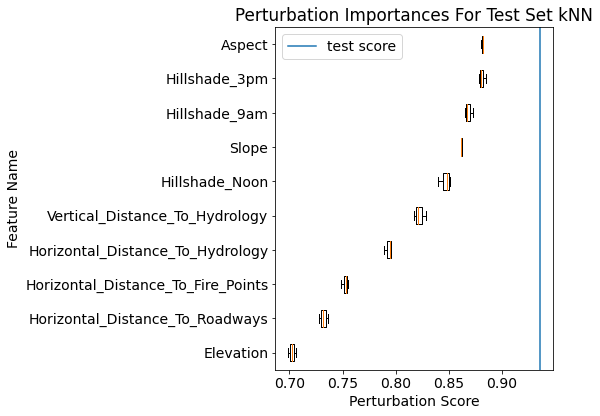

In [54]:
import matplotlib
from matplotlib import pylab as plt
sorted_indcs = np.argsort(np.mean(scores_feature_kNN,axis=1))#[::-1]
top_10 = sorted_indcs[0:10]
T = [feature_names[i] for i in top_10]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores_feature_kNN[top_10].T,labels=T,vert=False)
plt.axvline(test_score,label='test score')
plt.title("Perturbation Importances For Test Set kNN")
plt.xlabel('Perturbation Score')
plt.ylabel('Feature Name')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/feature_importance_kNN.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
y = df['Cover_Type'] 
X = df.loc[:, df.columns != 'Cover_Type'] 
preprocessor = StandardScaler()
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.1,stratify=y,random_state=112)
X_other, X_test, y_other, y_test = train_test_split(X_test,y_test,test_size = 0.5,stratify=y_test,random_state=112)

X_other_prep = preprocessor.fit_transform(X_other)
X_test_prep = preprocessor.transform(X_test)
le = LabelEncoder()
y_other_prep = le.fit_transform(y_other)
y_test_prep = le.transform(y_test)

df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
# print(df_test)
# print(y_test)

np.random.seed(112)

nr_runs = 3
scores = np.zeros([len(feature_names),nr_runs])
XGB = XGB_model
y_test_pred = XGB.predict(df_test)
print(y_test_pred)
fbeta_score(y_test_prep,y_test_pred,beta=1, average = 'weighted')

[3 1 1 ... 1 1 1]


0.9825186745483634

In [24]:
test_score = fbeta_score(y_test_prep,y_test_pred, beta=1, average = 'weighted')
print('test score = ',test_score)
#print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    fbeta_scores = []
    for j in range(nr_runs):
        df_test_shuffled = df_test.copy()
        df_test_shuffled[feature_names[i]] = np.random.permutation(df_test[feature_names[i]].values)
        y_pred_shuffled = XGB.predict(df_test_shuffled)
        fbeta_scores.append(fbeta_score(y_test_prep,y_pred_shuffled,beta=1, average = 'weighted'))
    print('   shuffled fbeta score:',np.around(np.mean(fbeta_scores),3),'+/-',np.around(np.std(fbeta_scores),3))
    scores[i] = fbeta_scores

test score =  0.9825186745483634
shuffling Elevation
   shuffled fbeta score: 0.507 +/- 0.001
shuffling Aspect
   shuffled fbeta score: 0.97 +/- 0.001
shuffling Slope
   shuffled fbeta score: 0.976 +/- 0.0
shuffling Horizontal_Distance_To_Hydrology
   shuffled fbeta score: 0.919 +/- 0.001
shuffling Vertical_Distance_To_Hydrology
   shuffled fbeta score: 0.946 +/- 0.001
shuffling Horizontal_Distance_To_Roadways
   shuffled fbeta score: 0.823 +/- 0.0
shuffling Hillshade_9am
   shuffled fbeta score: 0.968 +/- 0.0
shuffling Hillshade_Noon
   shuffled fbeta score: 0.957 +/- 0.001
shuffling Hillshade_3pm
   shuffled fbeta score: 0.977 +/- 0.0
shuffling Horizontal_Distance_To_Fire_Points
   shuffled fbeta score: 0.846 +/- 0.001
shuffling Wilderness_Area1
   shuffled fbeta score: 0.947 +/- 0.001
shuffling Wilderness_Area2
   shuffled fbeta score: 0.98 +/- 0.0
shuffling Wilderness_Area3
   shuffled fbeta score: 0.974 +/- 0.001
shuffling Wilderness_Area4
   shuffled fbeta score: 0.982 +/- 0.0
sh

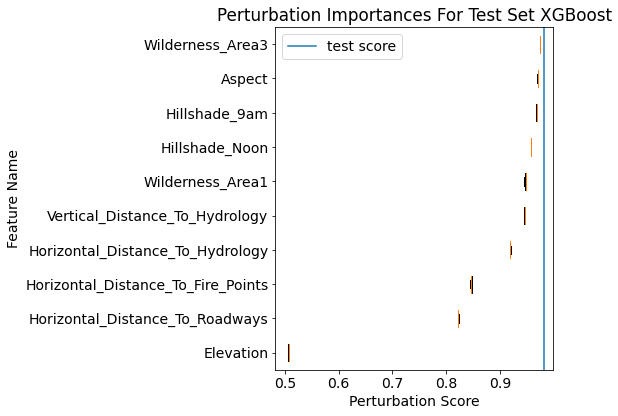

In [48]:
import matplotlib
from matplotlib import pylab as plt
sorted_indcs = np.argsort(np.mean(scores_feature_xgboost,axis=1))#[::-1]
top_10 = sorted_indcs[0:10]
T = [feature_names[i] for i in top_10]
# print(T)
# print(scores_feature_xgboost[top_10])
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores_feature_xgboost[top_10].T,labels=T,vert=False)
plt.axvline(test_score,label='test score')
plt.title("Perturbation Importances For Test Set XGBoost")
plt.xlabel('Perturbation Score')
plt.ylabel('Feature Name')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/feature_importance_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# import pickle
# file = open('../results/xgboost_feature_importance.save', 'wb')
# pickle.dump((scores, T),file)
# file.close()

In [45]:
import pickle
file = open('../results/xgboost_feature_importance.save', 'rb')
scores_feature_xgboost, T = pickle.load(file)
file.close()

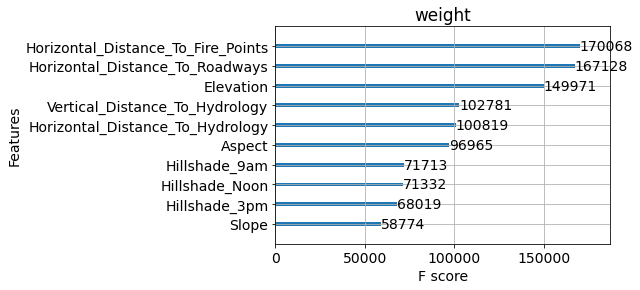

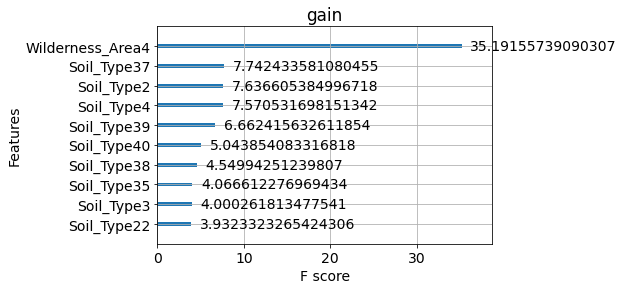

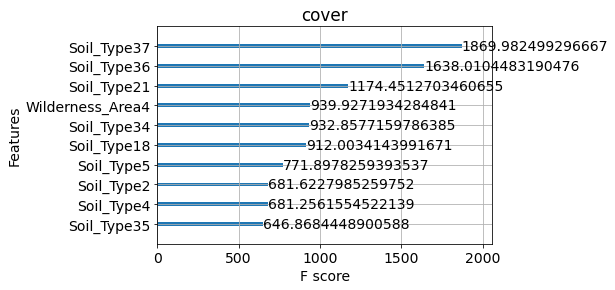

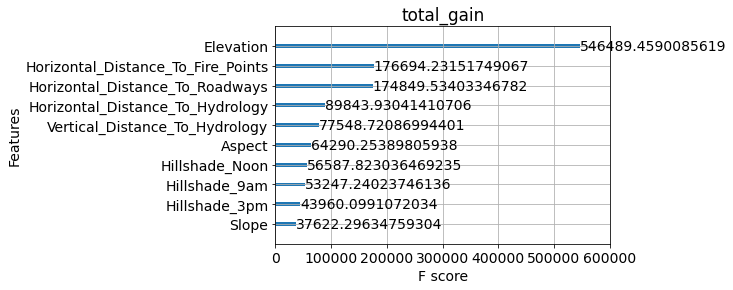

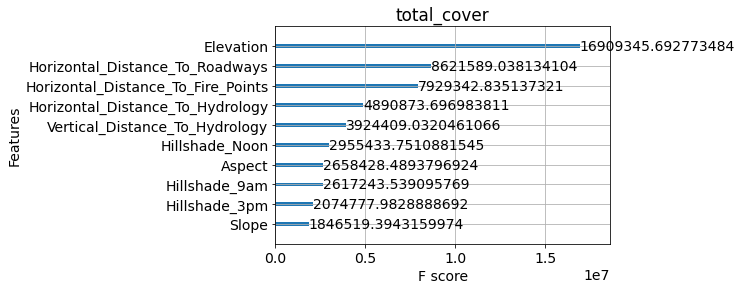

In [40]:
importance_types = ['weight','gain',
                   'cover','total_gain','total_cover']

from matplotlib import pyplot
from xgboost import plot_importance
for i in importance_types:
    plot_importance(XGB, max_num_features=10, importance_type=i) # top 10 most important features
    plt.title(i)
    plt.savefig('../figures/feature_importance_'+i+'.png', dpi=300, bbox_inches='tight')
    plt.show()